# Part 5.1 !! Pandas DataFrame to PostgreSQL using Python
<h3>How to read data from PostgreSQL to Pandas DataFrame?</h3>

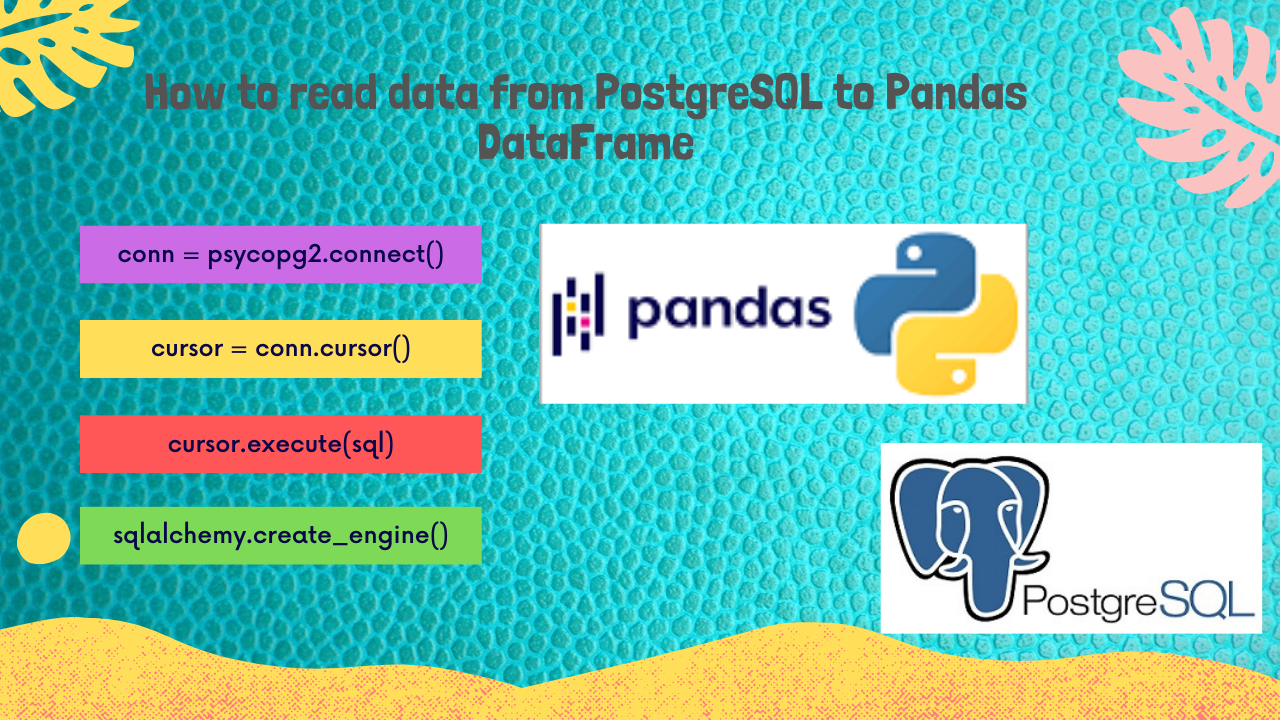

<h3>Prerequisites</h3>

<h4>(a) Python 3.8.3 </h4>

[Anaconda download link](https://www.anaconda.com/products/individual)

<h4>(b) PostgreSQL 13</h4>

[Download link](https://www.postgresql.org/download/)

<b>(c) Psycopg2 : </b> To install <b>Psycopg2</b> use the command: <b>pip install psycopg2</b>

<h3>Objective</h3>

Generally we create training and testing data by importing csv file into pandas DataFrame but when we have large data stored in database server then we need a method to extract it into pandas DataFrame directly from database server. For this objective, we will learn step by step working code for different methods for doing it.

<h3>Step 1 : Import libraries</h3>

In [19]:
# import sys to get more detailed Python exception info
import sys
# import the connect library for psycopg2
import psycopg2
# import the error handling libraries for psycopg2
from psycopg2 import OperationalError, errorcodes, errors
import psycopg2.extras as extras
from sqlalchemy import create_engine
import pandas as pd

<h3>Step 2: Specify the connection parameters</h3>

In [20]:
# Note: please change your database, username & password as per your own values

conn_params_dic = {
    "host"      : "localhost",
    "database"  : "irisdb",
    "user"      : "postgres",
    "password"  : "Passw0rd"
}

<h3> Step 3 : Support Functions </h3>

In [21]:
# Define a function that handles and parses psycopg2 exceptions
def show_psycopg2_exception(err):
    # get details about the exception
    err_type, err_obj, traceback = sys.exc_info()    
    # get the line number when exception occured
    line_n = traceback.tb_lineno    
    # print the connect() error
    print ("\npsycopg2 ERROR:", err, "on line number:", line_n)
    print ("psycopg2 traceback:", traceback, "-- type:", err_type) 
    # psycopg2 extensions.Diagnostics object attribute
    print ("\nextensions.Diagnostics:", err.diag)    
    # print the pgcode and pgerror exceptions
    print ("pgerror:", err.pgerror)
    print ("pgcode:", err.pgcode, "\n")
    
# Define a connect function for PostgreSQL database server
def connect(conn_params_dic):
    conn = None
    try:
        print('Connecting to the PostgreSQL...........')
        conn = psycopg2.connect(**conn_params_dic)
        print("Connection successful..................")
        
    except OperationalError as err:
        # passing exception to function
        show_psycopg2_exception(err)        
        # set the connection to 'None' in case of error
        conn = None
    return conn

# Method 2 : Using psycopg2
# Define postgresql_to_dataframe function to load data into a pandas # dataframe
def postgresql_to_dataframe(conn, sql, col_names):
    cursor = conn.cursor()
    try:
        cursor.execute(sql)
    except (Exception, psycopg2.DatabaseError) as err:
        # passing exception to function
        show_psycopg2_exception(err)      
    
    # Naturally we get a list of tupples
    tupples = cursor.fetchall()
    cursor.close()
    
    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tupples, columns=col_names)
    return df

# Method 3 : Using psycopg2
# Define postgresql_to_dataframe function to load data into a pandas # dataframe
connect_alchemy = "postgresql+psycopg2://%s:%s@%s/%s" % (
    conn_params_dic['user'],
    conn_params_dic['password'],
    conn_params_dic['host'],
    conn_params_dic['database']
)
    
def using_alchemy(sql):
    try:
        engine = create_engine(connect_alchemy)
        df = pd.read_sql_query(sql,con=engine)
    except OperationalError as err:
        # passing exception to function
        show_psycopg2_exception(err) 
    return df

<h3> Step 4 : Perform main task</h3>

In [22]:
# Connecting to PostgreSQL Data
conn = connect(conn_params_dic)

col_names = ['sepal_length','sepal_width','petal_length','petal_width','species']

# Create a statement for querying PostgreSQL.
sql = "select * from iris"

Connecting to the PostgreSQL...........
Connection successful..................


### Method 1 : Using psycopg2

In [23]:
df = postgresql_to_dataframe(conn, sql, col_names)
print()
print(df.head())


  sepal_length sepal_width petal_length petal_width      species
0          5.1         3.5          1.4         0.2  setosa     
1          4.9         3.0          1.4         0.2  setosa     
2          4.7         3.2          1.3         0.2  setosa     
3          4.6         3.1          1.5         0.2  setosa     
4          5.0         3.6          1.4         0.2  setosa     


### Method 2 : Using psycopg2 and pd.read_sql_query()

In [24]:
conn = connect(conn_params_dic)
df = pd.read_sql_query(sql,con=conn)
df.head()

Connecting to the PostgreSQL...........
Connection successful..................


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Method 3 : Using sqlalchemy

In [25]:
df = using_alchemy(sql)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<b>Conclusion : </b> This ends our Part 5.1. In this tutorial we have learned how to load data from postgresql to pandas dataframe for further analysis.

<b>Stay Positive !! Stay Safe !! Keep Learning :):)

<h3>Thanks you for reading!!</h3>